In [1]:
import pickle as pickle
from pprint import pprint
import pandas as pd
from present import *

import pyLDAvis
import pyLDAvis.gensim as gensimvis# don't skip this
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
#pd.set_option('display.max_colwidth', None)

## Model List

- [Mallet LDA with 5 topics](#lda5)
    - Coherence Score
    - 5 Topics 
    - Visulization 
        - pyLDAvis
    - Basic Analysis 
        - Dominant Topic for each Document 
        - Representative Document for each Topic 
        - Topic Coverage 
    - Parts Rich Article
    
- [Mallet LDA with 10 topics](#lda10)
    - Coherence Score
    - 10 Topics 
    - Visulization 
        - pyLDAvis
    - Basic Analysis 
        - Dominant Topic for each Document 
        - Representative Document for each Topic 
        - Topic Coverage 
    - Parts Rich Article 
    
- [Mallet LDA with 15 topics](#lda15)
    - Coherence Score
    - 15 Topics 
    - Visulization 
        - pyLDAvis
    - Basic Analysis 
        - Dominant Topic for each Document 
        - Representative Document for each Topic 
        - Topic Coverage 
    - Parts Rich Article


<a id='lda5'></a>
## Mallet LDA, Quantile = 0.005, k=5

### Coherence Score

In [2]:
# Load Model 
with open("models/lda_k=5_q=0.005.pickle", "rb") as fp: 
    lda_5 = pickle.load(fp)
    
# Load Coherence Model 
with open("models/lda_k=5_q=0.005_coherence.pickle", "rb") as fp: 
    lda_5_co = pickle.load(fp)

# Load Corpus 
with open("data/no_ner_q=0.005_corpus.pickle", "rb") as fp: 
    corpus = pickle.load(fp)

score = lda_5_co.get_coherence()
score

0.5411104658945636

The coherence score of this model is **0.541**

### Topics

For each topic, we only print out the words whose weights are larger than 0.005.

In [3]:
df_lda_5 = topics_df(lda_5)
df_lda_5

,Terms per Topic
Topic1,"circuit, output, input, network, device, gate,..."
Topic2,"clone, cassette, integration, crispr, recombin..."
Topic3,"compound, coa, biosynthesis, carbon, biosensor..."
Topic4,"rb, terminator, codon, gfp, strength, variant,..."
Topic5,"domain, membrane, fusion, peptide, ligand, aff..."


### Visualization

### pyLDAvis

In this part, we use pyLDAvis to visualize the result of the topic model.

- On the left, the topics are plotted as circles, whose centers are defined by the computed distance between topics (projected into 2 dimensions). 
- The prevalence of each topic is indicated by the circle’s area. 
- On the right, two juxtaposed bars showing the topic-specific frequency of each term (in red) and the corpus-wide frequency (in blueish gray).

[Reference](https://www.objectorientedsubject.net/2018/08/experiments-on-topic-modeling-pyldavis/)

In [4]:
ldagensim = convertldaMalletToldaGen(lda_5)
vis_data = gensimvis.prepare(ldagensim, corpus, lda_5.id2word, sort_topics=False)
pyLDAvis.display(vis_data)

### Basic Analysis 

### Dominant Topic for each Document 

In [5]:
df = contribution_df(lda_5, corpus)
df.head()

,ID,Title,Dominant Topic,Contribution %
0,sb8b00527,Systematic Evaluation of CRISPRa and CRISPRi M...,2,76.26
1,sb9b00168,Synthesis and Characterization of Versatile O‑...,3,79.90
2,sb8b00241,Assembly of Multicomponent Protein Filaments U...,5,72.63
3,sb5b00295,Data Integration and Mining for Synthetic Biol...,1,90.28
4,sb9b00140,Engineering a Bifunctional Phr60-Rap60-Spo0A Q...,3,80.35


### Representative Document for each Topic 

In [6]:
(
    df
    .groupby('Dominant Topic')
    .apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0]))
    .reset_index(drop=True)
)

,ID,Title,Dominant Topic,Contribution %
0,sb8b00532,SBOL-OWL: An Ontological Approach for Formal a...,1,97.44
1,sb9b00224,CReasPy-Cloning: A Method for Simultaneous Clo...,2,91.33
2,sb9b00219,Producing Gram-Scale Unnatural Rosavin Analogu...,3,91.45
3,sb400140t,Cell-free Protein Synthesis from a Release Fac...,4,85.87
4,sb8b00365,Development of Whole-Porcine Monoclonal Antibo...,5,91.44


### Topic Coverage

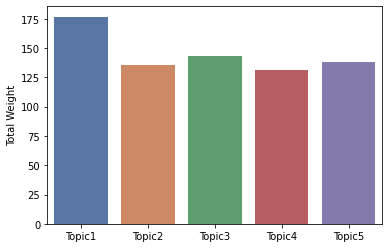

In [7]:
ax = plot_cov(find_docs(lda_5))
ax.set(ylabel='Total Weight')
plt.show()

### Parts Rich Arcticles 

In [8]:
pr_df = parts_rich_df(lda_5, 5, df)
pr_df

,id,Title,Dominant Topic,Contribution %,Similar Article
0,sb500366v,A Highly Characterized Yeast Toolkit for Modul...,2,70.20,An Accessible Continuous-Culture Turbidostat f...
1,sb6b00337,A Modular Toolkit for Generating,4,32.84,CipA and CipB as Scaffolds To Organize Protein...
2,sb9b00176,Synthetic Biology Tools for the Fast-Growing M...,4,60.72,Preventing T7 RNA Polymerase Read-through Tran...
3,sb5b00124,CIDAR MoClo: Improved MoClo Assembly Standard ...,2,41.60,Gene Expression Platform for Synthetic Biology...
4,sb6b00031,EcoFlex: A Multifunctional MoClo Kit for,2,39.74,Developing a Synthetic Biology Toolkit for
5,sb8b00251,Birth of a Photosynthetic Chassis: A MoClo Too...,2,35.51,High-Level dCas9 Expression Induces Abnormal C...
6,sb4001504,A Golden Gate Modular Cloning Toolbox for Plants,2,30.66,Model-Driven Engineering of N‑Linked Glycosyla...


<a id='lda10'></a>
## Mallet LDA, Quantile = 0.005, k=10

### Coherence Score

In [9]:
# Load Model 
with open("models/lda_k=10_q=0.005.pickle", "rb") as fp: 
    lda_10 = pickle.load(fp)
    
# Load Coherence Model 
with open("models/lda_k=10_q=0.005_coherence.pickle", "rb") as fp: 
    lda_10_co = pickle.load(fp)

# Load Corpus 
with open("data/no_ner_q=0.005_corpus.pickle", "rb") as fp: 
    corpus = pickle.load(fp)

score = lda_10_co.get_coherence()
score

0.544355632909505

The coherence score of this model is **0.544**

### Topics

For each topic, we only print out the words whose weights are larger than 0.005.

In [10]:
df_lda_10 = topics_df(lda_10)
df_lda_10

,Terms per Topic
Topic1,"circuit, output, input, gate, switch, network,..."
Topic2,"domain, peptide, affinity, biosensor, ligand, ..."
Topic3,"terminator, crispr, repression, phage, deletio..."
Topic4,"codon, sbol, trna, module, incorporation, clas..."
Topic5,"carbon, fermentation, deletion, accumulation, ..."
Topic6,"cassette, clone, cluster, yeast, integration, ..."
Topic7,"core, distribution, base, simulation, populati..."
Topic8,"coa, compound, biosynthesis, titer, electron, ..."
Topic9,"membrane, secretion, light, surface, antibody,..."
Topic10,"gfp, rb, operator, strength, inducer, regulato..."


### Visualization

### pyLDAvis

In this part, we use pyLDAvis to visualize the result of the topic model.

- On the left, the topics are plotted as circles, whose centers are defined by the computed distance between topics (projected into 2 dimensions). 
- The prevalence of each topic is indicated by the circle’s area. 
- On the right, two juxtaposed bars showing the topic-specific frequency of each term (in red) and the corpus-wide frequency (in blueish gray).

[Reference](https://www.objectorientedsubject.net/2018/08/experiments-on-topic-modeling-pyldavis/)

In [11]:
ldagensim = convertldaMalletToldaGen(lda_10)
vis_data = gensimvis.prepare(ldagensim, corpus, lda_10.id2word, sort_topics=False)
pyLDAvis.display(vis_data)

### Basic Analysis 

### Dominant Topic for each Document 

In [12]:
df = contribution_df(lda_10, corpus)
df.head()

,ID,Title,Dominant Topic,Contribution %
0,sb8b00527,Systematic Evaluation of CRISPRa and CRISPRi M...,3,59.21
1,sb9b00168,Synthesis and Characterization of Versatile O‑...,8,75.80
2,sb8b00241,Assembly of Multicomponent Protein Filaments U...,2,53.46
3,sb5b00295,Data Integration and Mining for Synthetic Biol...,4,77.83
4,sb9b00140,Engineering a Bifunctional Phr60-Rap60-Spo0A Q...,5,75.26


### Representative Document for each Topic 

In [13]:
(
    df
    .groupby('Dominant Topic')
    .apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0]))
    .reset_index(drop=True)
)

,ID,Title,Dominant Topic,Contribution %
0,sb7b00222,A Robust Molecular Network Motif for Period-Do...,1,91.28
1,sb200002m,A Comparison of Two Strategies for Affinity Ma...,2,86.36
2,sb8b00087,Multiplexed CRISPR-Cpf1-Mediated Genome Editin...,3,85.92
3,sb5b00210,"The SBOL Stack: A Platform for Storing, Publis...",4,92.66
4,sb9b00003,Metabolic Engineering of a Homoserine-Derived ...,5,88.16
5,sb400117c,Yeast Oligo-Mediated Genome Engineering (YOGE),6,84.99
6,sb5002196,Sequence Design for a Test Tube of Interacting...,7,93.62
7,sb5b00025,Pterin-Dependent Mono-oxidation for the Microb...,8,89.03
8,sb7b00022,Assembly Domain-Based Optogenetic System for t...,9,89.14
9,sb500249g,Stochasticity in Gene Expression in a Cell-Siz...,10,85.92


### Topic Coverage

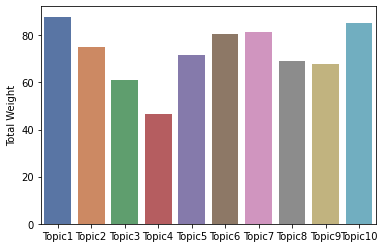

In [14]:
ax = plot_cov(find_docs(lda_10))
ax.set(ylabel='Total Weight')
plt.show()

### Parts Rich Arcticles 

In [15]:
pr_df = parts_rich_df(lda_10, 10, df)
pr_df

,id,Title,Dominant Topic,Contribution %,Similar Article
0,sb500366v,A Highly Characterized Yeast Toolkit for Modul...,6,65.27,RNAi-Assisted Genome Evolution in
1,sb6b00337,A Modular Toolkit for Generating,9,34.98,Bacterial MbtH-like Proteins Stimulate Nonribo...
2,sb9b00176,Synthetic Biology Tools for the Fast-Growing M...,10,54.32,The All
3,sb5b00124,CIDAR MoClo: Improved MoClo Assembly Standard ...,6,27.86,Gene Expression Platform for Synthetic Biology...
4,sb6b00031,EcoFlex: A Multifunctional MoClo Kit for,6,34.82,Randomized BioBrick Assembly: A Novel DNA Asse...
5,sb8b00251,Birth of a Photosynthetic Chassis: A MoClo Too...,9,22.90,Positive Detection of GPCR Antagonists Using a...
6,sb4001504,A Golden Gate Modular Cloning Toolbox for Plants,6,20.21,Model-Driven Engineering of N‑Linked Glycosyla...


<a id='lda15'></a>
## Mallet LDA, Quantile = 0.005, k=15

### Coherence Score

In [16]:
# Load Model 
with open("models/lda_k=15_q=0.005.pickle", "rb") as fp: 
    lda_15 = pickle.load(fp)
    
# Load Coherence Model 
with open("models/lda_k=15_q=0.005_coherence.pickle", "rb") as fp: 
    lda_15_co = pickle.load(fp)

# Load Corpus 
with open("data/no_ner_q=0.005_corpus.pickle", "rb") as fp: 
    corpus = pickle.load(fp)

score = lda_15_co.get_coherence()
score

0.49616360727118386

The coherence score of this model is **0.496**

### Topics

For each topic, we only print out the words whose weights are larger than 0.005.

In [17]:
df_lda_15 = topics_df(lda_15)
df_lda_15

,Terms per Topic
Topic1,"carbon, fermentation, flux, biomass, phosphate..."
Topic2,"peptide, compound, affinity, variant, mutant, ..."
Topic3,"cassette, yeast, crispr, integration, clone, d..."
Topic4,"cluster, operon, cre, shell, recombination, st..."
Topic5,"stress, tolerance, resistance, treatment, subt..."
Topic6,"sbol, class, module, database, algorithm, rule..."
Topic7,"rb, terminator, codon, strength, mrna, gfp, in..."
Topic8,"ligand, riboswitch, receptor, switch, activati..."
Topic9,"coa, biosynthesis, titer, chain, mg, alcohol, ..."
Topic10,"circuit, network, output, input, population, s..."


### Visualization

### pyLDAvis

In this part, we use pyLDAvis to visualize the result of the topic model.

- On the left, the topics are plotted as circles, whose centers are defined by the computed distance between topics (projected into 2 dimensions). 
- The prevalence of each topic is indicated by the circle’s area. 
- On the right, two juxtaposed bars showing the topic-specific frequency of each term (in red) and the corpus-wide frequency (in blueish gray).

[Reference](https://www.objectorientedsubject.net/2018/08/experiments-on-topic-modeling-pyldavis/)

In [18]:
ldagensim = convertldaMalletToldaGen(lda_15)
vis_data = gensimvis.prepare(ldagensim, corpus, lda_15.id2word, sort_topics=False)
pyLDAvis.display(vis_data)

### Basic Analysis 

### Dominant Topic for each Document 

In [19]:
df = contribution_df(lda_15, corpus)
df.head()

,ID,Title,Dominant Topic,Contribution %
0,sb8b00527,Systematic Evaluation of CRISPRa and CRISPRi M...,14,54.10
1,sb9b00168,Synthesis and Characterization of Versatile O‑...,2,79.86
2,sb8b00241,Assembly of Multicomponent Protein Filaments U...,2,33.88
3,sb5b00295,Data Integration and Mining for Synthetic Biol...,6,83.23
4,sb9b00140,Engineering a Bifunctional Phr60-Rap60-Spo0A Q...,5,51.59


### Representative Document for each Topic 

In [20]:
(
    df
    .groupby('Dominant Topic')
    .apply(lambda topic_set: (topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0]))
    .reset_index(drop=True)
)

,ID,Title,Dominant Topic,Contribution %
0,sb8b00093,Ribulose Monophosphate Shunt Provides Nearly A...,1,86.44
1,sb500019b,Recognition Sequences and Substrate Evolution ...,2,84.06
2,sb6b00060,Bacterial Genome Editing with CRISPR-Cas9: Del...,3,88.11
3,sb3000723,A Novel and Stable Mouse Artificial Chromosome...,4,83.55
4,sb500090b,Modified Lactic Acid Bacteria Detect and Inhib...,5,79.27
5,sb8b00532,SBOL-OWL: An Ontological Approach for Formal a...,6,96.25
6,sb300037w,Reducing Codon Redundancy and Screening Effort...,7,78.38
7,sb6b00199,Riboswitch-Based Reversible Dual Color Sensor,8,84.21
8,sb5b00025,Pterin-Dependent Mono-oxidation for the Microb...,9,89.47
9,sb8b00522,Design Principles for Compartmentalization and...,10,93.30


### Topic Coverage

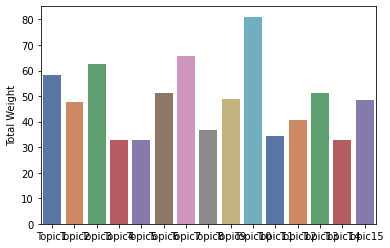

In [21]:
ax = plot_cov(find_docs(lda_15))
ax.set(ylabel='Total Weight')
plt.show()

### Parts Rich Arcticles 

In [22]:
pr_df = parts_rich_df(lda_15, 15, df)
pr_df

,id,Title,Dominant Topic,Contribution %,Similar Article
0,sb500366v,A Highly Characterized Yeast Toolkit for Modul...,3,64.63,Cloning and Transplantation of the
1,sb6b00337,A Modular Toolkit for Generating,14,46.00,Engineering Mannitol Biosynthesis in
2,sb9b00176,Synthetic Biology Tools for the Fast-Growing M...,7,44.69,Broad-Spectrum Gene Repression Using Scaffold ...
3,sb5b00124,CIDAR MoClo: Improved MoClo Assembly Standard ...,3,31.23,Gene Expression Platform for Synthetic Biology...
4,sb6b00031,EcoFlex: A Multifunctional MoClo Kit for,7,41.55,A Genome-Wide Activity Assessment of Terminato...
5,sb8b00251,Birth of a Photosynthetic Chassis: A MoClo Too...,3,16.63,Gene Expression Platform for Synthetic Biology...
6,sb4001504,A Golden Gate Modular Cloning Toolbox for Plants,3,22.42,BioBits Health: Classroom Activities Exploring...
